In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from fit import get_expectations_carrabin
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

### Reproduce Carrabin Fig 3

In [4]:
human = pd.read_pickle("data/carrabin.pkl")
bayes = pd.read_pickle("data/bayes_jan24_dynamics.pkl")

In [5]:
human['bayes'] = bayes['response']
bayes['bayes'] = bayes['response']
combined = pd.concat([human, bayes], ignore_index=True)

In [6]:
combined

,type,sid,trial,stage,color,response,delta response,bayes
0,human,1,1,1,1,0.500000,0.500,0.333333
1,human,1,1,2,-1,0.000000,0.500,0.000000
2,human,1,1,3,-1,-0.500000,0.500,-0.200000
3,human,1,1,4,-1,-0.598000,0.098,-0.333333
4,human,1,1,5,-1,-0.800000,0.202,-0.428571
...,...,...,...,...,...,...,...,...
41505,bayes,21,200,1,1,0.333333,NaN,0.333333
41506,bayes,21,200,2,1,0.500000,NaN,0.500000
41507,bayes,21,200,3,1,0.600000,NaN,0.600000
41508,bayes,21,200,4,1,0.666667,NaN,0.666667


/tmp/ipykernel_5992/3530315094.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(data=combined, x='bayes', y='response', hue='type', ax=ax, palette=palette)


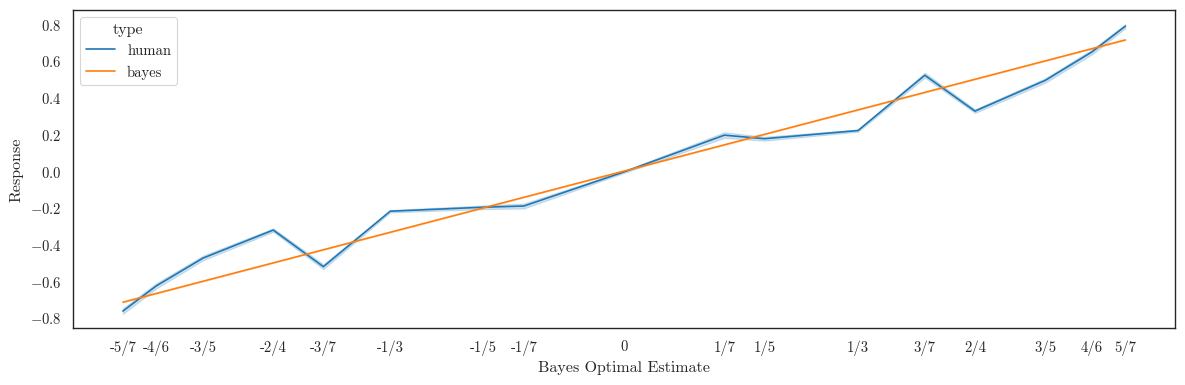

In [7]:
fig, ax = plt.subplots(figsize=(12,4))
# labels = ['1/7', '1/6', '1/5', '1/4', '2/7', '1/3', '2/5', '3/7', '1/2', '4/7', '3/5', '2/3', '5/7', '3/4', '4/5', '5/6', '6/7']
xticks = [-5/7, -4/6, -3/5, -2/4, -3/7, -1/3, -1/5, -1/7, 0, 1/7, 1/5, 1/3, 3/7, 2/4, 3/5, 4/6, 5/7]
labels = ['-5/7', '-4/6', '-3/5', '-2/4', '-3/7', '-1/3', '-1/5', '-1/7', '0', '1/7', '1/5', '1/3', '3/7', '2/4', '3/5', '4/6', '5/7']
sns.lineplot(data=combined, x='bayes', y='response', hue='type', ax=ax, palette=palette)
ax.set(xlabel='Bayes Optimal Estimate', xticks=xticks, xticklabels=labels, ylabel='Response')
plt.tight_layout()
plt.show()

### RMSE

/tmp/ipykernel_5992/296306012.py:7: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.boxplot(combined, x='type', y='RMSE', hue='type', ax=ax, palette=palette[:4], notch=False, width=0.5)


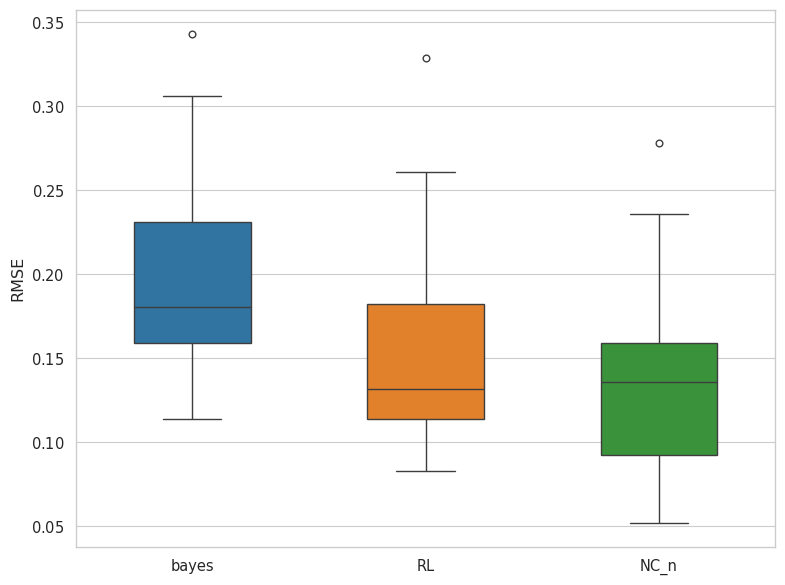

In [20]:
bayes = pd.read_pickle("data/bayes_jan24_performance.pkl")
rl = pd.read_pickle("data/RL_jan24_performance.pkl")
nc_n = pd.read_pickle("data/NC_n_jan24_performance.pkl")
combined = pd.concat([bayes, rl, nc_n], ignore_index=True)
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), sharex=True, sharey='row')
    sns.boxplot(combined, x='type', y='RMSE', hue='type', ax=ax, palette=palette[:4], notch=False, width=0.5)
    ax.set(xlabel=None, ylabel='RMSE') 
    plt.tight_layout()
    fig.savefig("plots/carrabin_RMSE.jpg", dpi=600)

### Response bias vs bayes

/tmp/ipykernel_5992/529973917.py:14: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=human, x='bayes', y='bias', hue='stage', ax=axes[0][0], palette=palette)
/tmp/ipykernel_5992/529973917.py:15: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=rl, x='bayes', y='bias', hue='stage', ax=axes[1][0], palette=palette)
/tmp/ipykernel_5992/529973917.py:16: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=bayes, x='bayes', y='bias', hue='stage', ax=axes[2][0], palette=palette)
/tmp/ipykernel_5992/529973917.py:17: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=nc_n, x='bayes', y='bias', hue='stage', ax=axes[3][0], palette=palette)
/tmp/ipykernel_5992/529973917.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been 

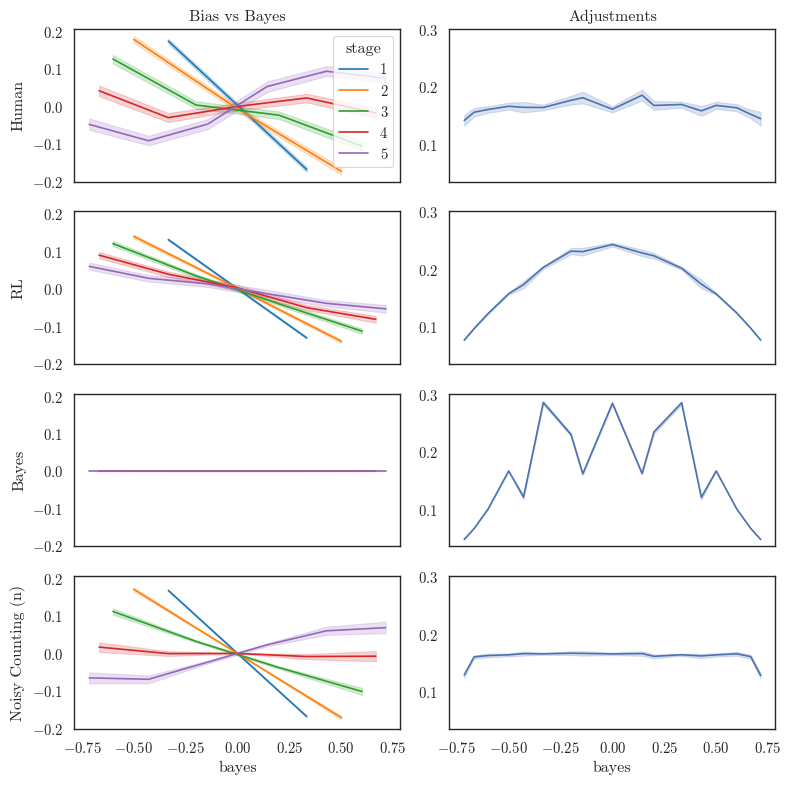

In [23]:
bayes = pd.read_pickle("data/bayes_jan24_dynamics.pkl")
rl = pd.read_pickle("data/RL_jan24_dynamics.pkl")
nc_n = pd.read_pickle("data/NC_n_jan24_dynamics.pkl")

human['bias'] = human['response'] - human['bayes']
bayes['bayes'] = human['bayes']
bayes['bias'] = bayes['response'] - bayes['response']
rl['bayes'] = human['bayes']
rl['bias'] = rl['response'] - human['bayes']
nc_n['bayes'] = human['bayes']
nc_n['bias'] = nc_n['response'] - human['bayes']

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=True, sharey='col', figsize=(8,8))
sns.lineplot(data=human, x='bayes', y='bias', hue='stage', ax=axes[0][0], palette=palette)
sns.lineplot(data=rl, x='bayes', y='bias', hue='stage', ax=axes[1][0], palette=palette)
sns.lineplot(data=bayes, x='bayes', y='bias', hue='stage', ax=axes[2][0], palette=palette)
sns.lineplot(data=nc_n, x='bayes', y='bias', hue='stage', ax=axes[3][0], palette=palette)
sns.lineplot(data=human, x='bayes', y='delta response', ax=axes[0][1], palette=palette)
sns.lineplot(data=rl, x='bayes', y='delta response', ax=axes[1][1], palette=palette)
sns.lineplot(data=bayes, x='bayes', y='delta response', ax=axes[2][1], palette=palette)
sns.lineplot(data=nc_n, x='bayes', y='delta response', ax=axes[3][1], palette=palette)
axes[0][0].set(ylabel='Human', title='Bias vs Bayes')
axes[1][0].set(ylabel='RL')
axes[2][0].set(ylabel='Bayes')
axes[3][0].set(ylabel='Noisy Counting (n)')
axes[0][1].set(ylabel=None, title='Adjustments')
axes[1][1].set(ylabel=None)
axes[2][1].set(ylabel=None)
axes[3][1].set(ylabel=None)
axes[1][0].get_legend().remove()
axes[2][0].get_legend().remove()
axes[3][0].get_legend().remove()
plt.tight_layout()
plt.show()